# Building a Model for Predicting Death Events Due to Heart Failure Using Decision Tree









This project aims to build a classification model using a Decision Tree to predict whether a patient will die during the follow-up period due to heart failure. The dataset contains various medical attributes of patients, and the target variable is **"DEATH_EVENT"** (0 = Survived, 1 = Deceased).  

The model will be developed following these steps:  
1. **Data Preparation** – Load and explore the dataset, then split it into training (80%) and testing (20%) sets without using a fixed random state.  
2. **Model Training** – Train multiple Decision Tree models with default hyperparameters to observe variations in performance.  
3. **Evaluation** – Assess model accuracy on both training and testing datasets to check for overfitting or underfitting.  
4. **Analysis & Comparison** – Compare the performance of multiple models to identify inconsistencies and potential improvements.  
5. **Hyperparameter Tuning** – Adjust key parameters such as **max depth** and **minimum samples per split** to enhance model generalization.  

The goal is to develop a stable and accurate model that can assist in predicting high-risk heart failure cases based on patient data.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# تحميل البيانات
file_path = "heart_failure_clinical_records-sample (1).csv"  # استبدل هذا بمسار ملف البيانات الخاص بك
df = pd.read_csv(file_path)

# عرض أول 5 صفوف من البيانات
df.head()


,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1820,50.0,1,1051,1,30,0,232000.0,0.7,136,0,0,246,0
1,1587,40.0,1,129,0,35,0,255000.0,0.9,137,1,0,209,0
2,2782,65.0,1,305,0,25,0,298000.0,1.1,141,1,0,87,0
3,4789,40.0,0,582,1,35,0,222000.0,1.0,132,1,0,244,0
4,2048,63.0,1,61,1,40,0,221000.0,1.1,140,0,0,86,0


In [11]:
target_correlation = df.corr()["DEATH_EVENT"].sort_values(ascending=False)

# عرض القيم
print(target_correlation)

DEATH_EVENT                 1.000000
serum_creatinine            0.281589
age                         0.234968
high_blood_pressure         0.190448
smoking                     0.117941
creatinine_phosphokinase    0.109019
sex                         0.100608
anaemia                     0.053376
Unnamed: 0                  0.014114
diabetes                   -0.060227
platelets                  -0.083237
serum_sodium               -0.278178
ejection_fraction          -0.334190
time                       -0.556686
Name: DEATH_EVENT, dtype: float64


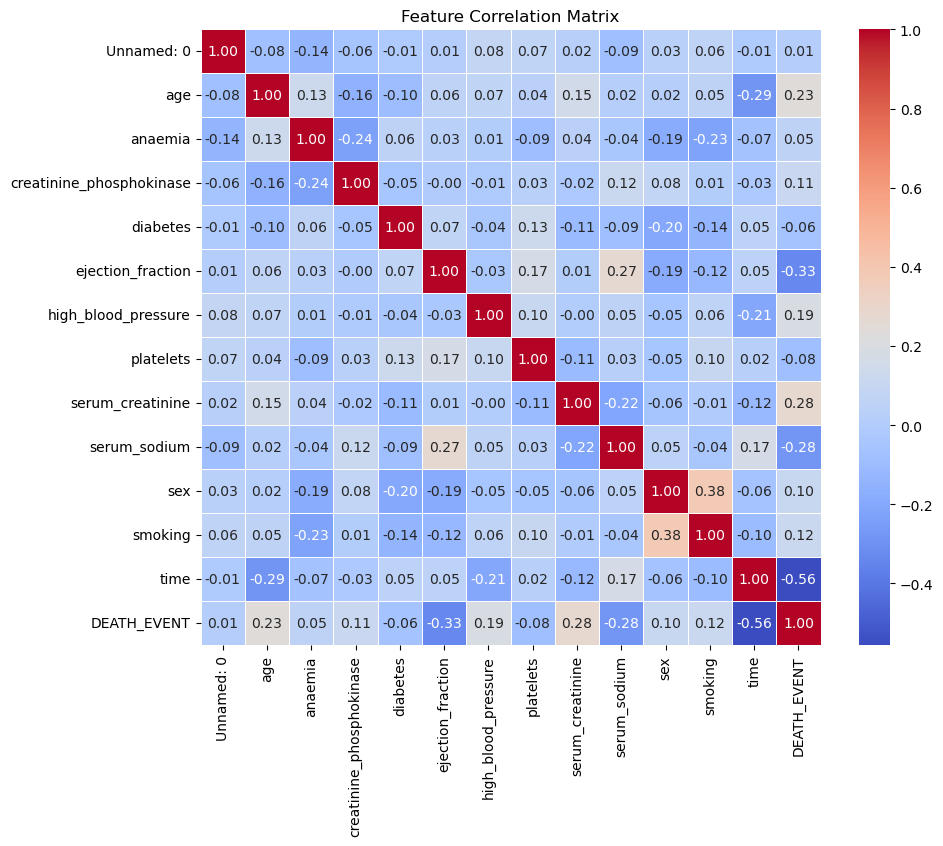

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# حساب مصفوفة الارتباط
correlation_matrix = df.corr()

# رسم خريطة حرارية (Heatmap) لتوضيح الارتباط
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


In [3]:
# فصل الميزات (features) عن المتغير المستهدف (target)
X = df.drop(columns=["DEATH_EVENT"])  # حذف العمود المستهدف من الميزات
y = df["DEATH_EVENT"]  # تحديد المتغير المستهدف (0 = لم يتوفَ, 1 = توفي)



In [4]:
# قائمة لتخزين النتائج
results = []

for i in range(7):  # تنفيذ التدريب 7 مرات
    # تقسيم البيانات إلى تدريب واختبار بنسبة 80:20 بدون تحديد random_state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # تدريب نموذج شجرة القرار باستخدام القيم الافتراضية
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # تقييم النموذج على بيانات التدريب والاختبار
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    # حفظ النتائج
    results.append((train_acc, test_acc))

    print(f"النموذج {i+1}: دقة التدريب = {train_acc:.4f}, دقة الاختبار = {test_acc:.4f}")


النموذج 1: دقة التدريب = 1.0000, دقة الاختبار = 0.8667
النموذج 2: دقة التدريب = 1.0000, دقة الاختبار = 0.8333
النموذج 3: دقة التدريب = 1.0000, دقة الاختبار = 0.8833
النموذج 4: دقة التدريب = 1.0000, دقة الاختبار = 0.8167
النموذج 5: دقة التدريب = 1.0000, دقة الاختبار = 0.8000
النموذج 6: دقة التدريب = 1.0000, دقة الاختبار = 0.8500
النموذج 7: دقة التدريب = 1.0000, دقة الاختبار = 0.8667


In [5]:
import numpy as np

train_accs, test_accs = zip(*results)

print("\nتحليل النماذج:")
print(f"متوسط دقة التدريب: {np.mean(train_accs):.4f}")
print(f"متوسط دقة الاختبار: {np.mean(test_accs):.4f}")
print(f"الانحراف المعياري لدقة الاختبار: {np.std(test_accs):.4f}")



تحليل النماذج:
متوسط دقة التدريب: 1.0000
متوسط دقة الاختبار: 0.8452
الانحراف المعياري لدقة الاختبار: 0.0278


In [6]:
# ضبط المعاملات لتجنب فرط التكيف
best_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10)
best_model.fit(X_train, y_train)

# تقييم النموذج المحسن
train_acc_tuned = accuracy_score(y_train, best_model.predict(X_train))
test_acc_tuned = accuracy_score(y_test, best_model.predict(X_test))

print(f"\nالنموذج المحسن: دقة التدريب = {train_acc_tuned:.4f}, دقة الاختبار = {test_acc_tuned:.4f}")



النموذج المحسن: دقة التدريب = 0.9333, دقة الاختبار = 0.9000
